# Anomaly Detection in Network Traffic using Machine Learning Algorithms


### Bachelor Thesis
### Constructor University Bremen
### BSc in Computer Science

#### 31 January 2025

# Introduction

This research explores the effectiveness of machine learning algorithms in detecting anomalies within network traffic. This notebook employs the raw data of the UNSW-NB15 dataset to evaluate the performance of several machine learning algorithm, including Logistic Regression, Decision Tree, Random Forests, Support Vector Classifier (SVC) and Multi-Layer Perceptron (MLP).  

Comprehensive preprocessing and operations are conducted in this notebook:
- Data cleaning
- Data normalization
- Feature selection 
- Data splitting
- Cross validation


# 1. Library Import

In [2]:
# data processing and plots
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# data preprocessing
from sklearn.preprocessing import StandardScaler

# data training model and classifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# performance metrics
from sklearn.metrics import accuracy_score, precision_score, precision_recall_curve, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")



# 2. Data Loading

In [3]:
# load the UNSW-NB15 dataset (Put the datasets in the same working directory)
# 4 CSV files are provided. The 4 files are merged to a single data set 
## Due to file and memory size, this notebook will load one of the 4 files only 
# Reading datasets (in same working directory)
dfs = []
##for i in range(1,5):  # use this statement when need to load all 4 files 
for i in range(1,2):    # change 2 to 5 when 4 files are loaded, instead of 1
    path = 'UNSW-NB15_{}.csv'                       # load the input csv files one by one
    dfs.append(pd.read_csv(path.format(i), header = None,low_memory=False))
data = pd.concat(dfs).reset_index(drop=True)        # merge all files into a single dataframe

In [4]:
# Get the feature names from the features csv
df_col = pd.read_csv('NUSW-NB15_features.csv', encoding='ISO-8859-1')

# Make column names lower case, removing spaces
df_col['Name'] = df_col['Name'].apply(lambda x: x.strip().replace(' ', '').lower())

# Rename our dataframe with proper column names
data.columns = df_col['Name']

In [5]:
# Show the shape of dataset (row and columns)
data.shape

(700001, 49)

In [6]:
# Show the data info and content of dataset
data.info()
display(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700001 entries, 0 to 700000
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   srcip             700001 non-null  object 
 1   sport             700001 non-null  object 
 2   dstip             700001 non-null  object 
 3   dsport            700001 non-null  object 
 4   proto             700001 non-null  object 
 5   state             700001 non-null  object 
 6   dur               700001 non-null  float64
 7   sbytes            700001 non-null  int64  
 8   dbytes            700001 non-null  int64  
 9   sttl              700001 non-null  int64  
 10  dttl              700001 non-null  int64  
 11  sloss             700001 non-null  int64  
 12  dloss             700001 non-null  int64  
 13  service           700001 non-null  object 
 14  sload             700001 non-null  float64
 15  dload             700001 non-null  float64
 16  spkts             70

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699996,59.166.0.8,12520,149.171.126.6,31010,tcp,FIN,0.020383,320,1874,31,...,0,8,20,7,5,1,1,4,NaN,0
699997,59.166.0.0,18895,149.171.126.9,80,tcp,FIN,1.402957,19410,1087890,31,...,0,1,1,2,7,2,2,2,NaN,0
699998,59.166.0.0,30103,149.171.126.5,5190,tcp,FIN,0.007108,2158,2464,31,...,0,13,13,6,7,2,1,2,NaN,0
699999,59.166.0.6,30388,149.171.126.5,111,udp,CON,0.004435,568,304,31,...,0,10,13,6,5,1,1,3,NaN,0


# 3. Data Cleaning

In [7]:
# Remove duplicates
data.drop_duplicates(inplace=True)

In [8]:
# check for null values
data.isnull().sum()

Name
srcip                    0
sport                    0
dstip                    0
dsport                   0
proto                    0
state                    0
dur                      0
sbytes                   0
dbytes                   0
sttl                     0
dttl                     0
sloss                    0
dloss                    0
service                  0
sload                    0
dload                    0
spkts                    0
dpkts                    0
swin                     0
dwin                     0
stcpb                    0
dtcpb                    0
smeansz                  0
dmeansz                  0
trans_depth              0
res_bdy_len              0
sjit                     0
djit                     0
stime                    0
ltime                    0
sintpkt                  0
dintpkt                  0
tcprtt                   0
synack                   0
ackdat                   0
is_sm_ips_ports          0
ct_state_ttl           

In [9]:
# Remove null values
data['ct_flw_http_mthd']=data.ct_flw_http_mthd.fillna(value=0)
data['is_ftp_login']=(data.is_ftp_login.fillna(value=0)).astype(int)

# fill 'normal' value for null values in attack_cat column, and remove spaces and change to lower cases
data['attack_cat'] = data.attack_cat.fillna(value='normal').apply(lambda x: x.strip().lower())

In [10]:
# check for null values after remove
data.isnull().sum().sum()

0

In [11]:
# Show the data info 
print("Dataset Information")
print(data.info())
print("\nShow the first few rows of the Dataset")
print(data.head())

Dataset Information
<class 'pandas.core.frame.DataFrame'>
Int64Index: 640788 entries, 0 to 700000
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   srcip             640788 non-null  object 
 1   sport             640788 non-null  object 
 2   dstip             640788 non-null  object 
 3   dsport            640788 non-null  object 
 4   proto             640788 non-null  object 
 5   state             640788 non-null  object 
 6   dur               640788 non-null  float64
 7   sbytes            640788 non-null  int64  
 8   dbytes            640788 non-null  int64  
 9   sttl              640788 non-null  int64  
 10  dttl              640788 non-null  int64  
 11  sloss             640788 non-null  int64  
 12  dloss             640788 non-null  int64  
 13  service           640788 non-null  object 
 14  sload             640788 non-null  float64
 15  dload             640788 non-null  float64
 16  

# 4. About the Data

### Show the distribution and number of the attack category and normal class (non-attack data)


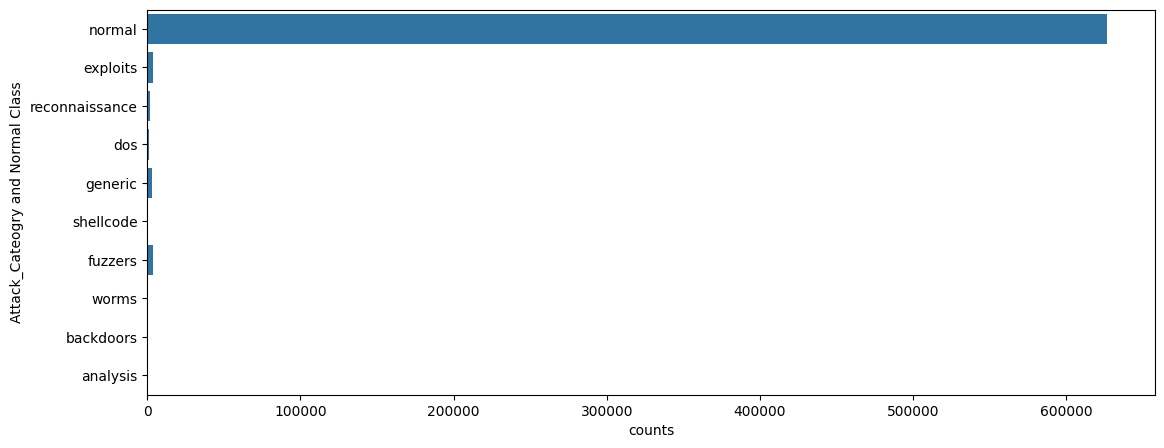

In [12]:
# Show distribution of attack category and normal class (non-attack data)
plt.figure(figsize=(13,5))
plt.xlabel('counts')
plt.ylabel('Attack_Cateogry and Normal Class')
sns.countplot(data['attack_cat'].values,label="Sum")
plt.show()


In [13]:
# show the number of the values (normal 0 and abnormal 1)
print("Show the number of Normal Class and Attack_Category")
data['label'].value_counts() 


Show the number of Normal Class and Attack_Category


0    626510
1     14278
Name: label, dtype: int64

In [14]:
# Show the number of attack_cat 
print("Show number and types of Attack Category")

data['attack_cat'].value_counts()

Show number and types of Attack Category


normal            626510
exploits            4042
fuzzers             3991
generic             2833
reconnaissance      1740
dos                  825
analysis             301
backdoors            299
shellcode            223
worms                 24
Name: attack_cat, dtype: int64

# 5. Split the dataset into training and testing sets (80-20)

In [15]:
# Split data into training and testing sets with size 80-20 
train, test = train_test_split(data, test_size=0.2, random_state=42)

In [16]:
print('\nShow the shape of the training and testing datasets after data splitting, rows and columns')
print(train.shape,'\n',test.shape)


Show the shape of the training and testing datasets after data splitting, rows and columns
(512630, 49) 
 (128158, 49)


In [17]:
# find category feature columns 
cat_col = train.select_dtypes(exclude=np.number).columns

In [18]:
print('\nShow list of category feature columns')
cat_col


Show list of category feature columns


Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service',
       'attack_cat'],
      dtype='object', name='Name')

In [19]:
# Drop columns that are not useful for the classification 
# attact_cat, srcip, sport, dstip, dsport, proto, state, servie : are dropped 
train.drop(['attack_cat','srcip','sport','dstip','dsport','proto','state','service'],axis=1, inplace=True)
test.drop(['attack_cat','srcip','sport','dstip','dsport','proto','state','service'],axis=1, inplace=True)

In [20]:
# Create the x and y training and testing set from the train and test dataset, drop the label column from training
x_train, y_train = train.drop(columns=['label']), train['label'] 
x_test, y_test = test.drop(columns=['label']), test['label']

In [21]:
print ('\nShow the shape of the x and y training and testing dataset after dropped the Label, attack_cat and category column')
print(x_train.shape,'\n',y_train.shape)
print()
print(x_test.shape,'\n',y_test.shape)


Show the shape of the x and y training and testing dataset after dropped the Label, attack_cat and category column
(512630, 40) 
 (512630,)

(128158, 40) 
 (128158,)


In [22]:
print('\nShow the data info of the x_training dataset')
x_train.head()


Show the data info of the x_training dataset


Name,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,sload,dload,spkts,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
276731,1.073962,1580,10168,31,29,3,5,1.079368e+04,7.154071e+04,12,...,1,0,0,2,4,2,2,1,1,1
411162,0.001699,520,304,31,29,0,0,1.836374e+06,1.073573e+06,4,...,0,0,0,2,3,3,2,1,1,2
502357,0.054034,4862,79236,31,29,7,36,7.114039e+05,1.159492e+07,84,...,0,0,0,4,5,3,3,1,1,1
63794,1.044222,1684,10168,31,29,3,5,1.198213e+04,7.357823e+04,14,...,1,0,0,3,3,8,3,1,1,1
450266,0.510301,568,312,31,29,0,0,6.678412e+03,3.668423e+03,4,...,0,0,0,9,11,7,6,1,1,2


In [23]:
y_train.head()

276731    0
411162    0
502357    0
63794     0
450266    0
Name: label, dtype: int64

# 6. Feature Selection - Correlation Analysis 

In [24]:
# Function to find the correlation between two feature columns

def corr(col1, col2="label", df=x_train):
    """
    This function returns correlation between 2 given features
    """
    return df[[col1, col2]].corr().iloc[0,1]

In [25]:
# Find the features with high correlation and Remove them (with correlation > 0.9)
# https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python
co_matrix = x_train.corr().abs()

# Select upper triangle of correlation matrix
upper = co_matrix.where(np.triu(np.ones(co_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

In [26]:
print('\nShow list of features with high correlation')
print(to_drop)


Show list of features with high correlation
['sloss', 'dloss', 'dpkts', 'dwin', 'ltime', 'synack', 'ackdat']


In [27]:
# remove the highly correlated features from x_train and x_test
x_train.drop(columns=to_drop, inplace=True)
x_test.drop(columns=to_drop, inplace=True)

In [28]:
print('\nShow the shape of the trainnig and testing x dataset after removing the highly correlated features')
x_train.shape, x_test.shape


Show the shape of the trainnig and testing x dataset after removing the highly correlated features


((512630, 33), (128158, 33))

# 7. Normalize the features (Standardize numeric columns)

In [29]:
# find numeric feature columns
num_col = x_train.select_dtypes(include=np.number).columns

In [30]:
# Standardizing the data (data normalization)
scaler = StandardScaler()
scaler = scaler.fit(x_train[num_col])

In [31]:
x_train[num_col] = scaler.transform(x_train[num_col])

In [32]:
x_train.head()

Name,dur,sbytes,dbytes,sttl,dttl,sload,dload,spkts,swin,stcpb,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
276731,0.024364,-0.071500,-0.196296,-0.16134,-0.117144,-0.088238,-0.664300,-0.368507,0.634533,-0.013747,...,1.245289,-0.130863,-0.110529,-0.860792,-0.388227,-0.594912,-0.668668,-0.32829,-0.203848,-0.557761
411162,-0.036684,-0.093949,-0.253593,-0.16134,-0.117144,-0.048941,-0.443340,-0.473858,-1.575987,-1.070473,...,-0.207205,-0.130863,-0.110529,-0.860792,-0.627582,-0.239684,-0.668668,-0.32829,-0.203848,0.072335
502357,-0.033705,-0.001996,0.204902,-0.16134,-0.117144,-0.073157,1.876739,0.579656,0.634533,-0.780141,...,-0.207205,-0.130863,-0.110529,-0.423543,-0.148872,-0.239684,-0.357930,-0.32829,-0.203848,-0.557761
63794,0.022671,-0.069298,-0.196296,-0.16134,-0.117144,-0.088213,-0.663851,-0.342169,0.634533,1.897410,...,1.245289,-0.130863,-0.110529,-0.642168,-0.627582,1.536456,-0.357930,-0.32829,-0.203848,-0.557761
450266,-0.007728,-0.092932,-0.253547,-0.16134,-0.117144,-0.088327,-0.679267,-0.473858,-1.575987,-1.070473,...,-0.207205,-0.130863,-0.110529,0.669581,1.287257,1.181228,0.574282,-0.32829,-0.203848,0.072335


In [33]:
x_test[num_col] = scaler.transform(x_test[num_col])

In [34]:
x_test.head()

Name,dur,sbytes,dbytes,sttl,dttl,sload,dload,spkts,swin,stcpb,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
410480,-0.033978,-0.051128,-0.125058,-0.16134,-0.117144,-0.079799,0.104643,0.000223,0.634533,-0.720389,...,-0.207205,-0.130863,-0.110529,0.669581,-0.388227,-0.594912,-0.047193,-0.32829,-0.203848,0.072335
118551,-0.036044,-0.048925,-0.114114,-0.16134,-0.117144,-0.054104,2.558888,0.026561,0.634533,0.261030,...,-0.207205,-0.130863,-0.110529,0.232332,0.569193,0.826000,-0.668668,-0.32829,-0.203848,-0.557761
525054,-0.035255,-0.027028,-0.240489,-0.16134,-0.117144,-0.066129,-0.519949,-0.289493,0.634533,0.942663,...,-0.207205,-0.130863,-0.110529,-0.642168,0.329838,-0.594912,-0.979405,-0.32829,-0.203848,-0.557761
246600,-0.035327,-0.072348,-0.245810,-0.16134,-0.117144,-0.078732,-0.572786,-0.315831,0.634533,1.277555,...,-0.207205,-0.130863,-0.110529,0.450957,0.090483,-0.950140,0.263545,-0.32829,-0.203848,-0.557761
231871,-0.036723,-0.101869,-0.254325,-0.16134,-0.117144,-0.076182,-0.526601,-0.500196,-1.575987,-1.070473,...,-0.207205,-0.130863,-0.110529,-0.642168,-0.866937,-0.239684,-0.668668,-0.32829,-0.203848,-0.557761


# 8. Model Training and Performance Evaluation with ML Algorithms 

## a1. Logistric Regression - Training

In [42]:
# Peformance Evaluation using cross-validation 
# Assign Logistic Regression classifier
clf = LogisticRegression(solver='lbfgs', random_state=123, max_iter = 4000)

# Apply Stratified 10-fold cross-validator, it provides train/validate indices to split data in train/validate sets.
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

# Set the performance metrics for evaluating
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# perform the 10-fold CV and get the metrics results
cv_results = cross_validate(estimator=clf,
                            X=x_train,
                            y=y_train,
                            scoring=scoring,
                            cv=cv,
                            return_train_score=False) 

In [43]:
cv_results

{'fit_time': array([ 3.32585478,  4.37222743,  8.40428114,  9.50690174,  3.11775231,
         8.66023183,  4.14350009,  3.39787269, 10.17474031,  3.0286088 ]),
 'score_time': array([0.11994815, 0.18918419, 0.12017488, 0.13689041, 0.09445953,
        0.13575578, 0.06329608, 0.14149547, 0.07855678, 0.10632277]),
 'test_accuracy': array([0.99260675, 0.99325049, 0.99268478, 0.99338704, 0.99317246,
        0.99301641, 0.99305542, 0.9935431 , 0.99305542, 0.99282133]),
 'test_precision': array([0.80221519, 0.81956696, 0.79813665, 0.81955485, 0.81593625,
        0.80688038, 0.81155978, 0.82171157, 0.80862745, 0.80265211]),
 'test_recall': array([0.88713911, 0.89413823, 0.89938758, 0.90201225, 0.89588801,
        0.90288714, 0.8967629 , 0.90726159, 0.90201225, 0.89947552]),
 'test_f1': array([0.84254258, 0.85523013, 0.84574249, 0.85880883, 0.85404504,
        0.85218827, 0.85203658, 0.86237006, 0.85277089, 0.84830998]),
 'test_roc_auc': array([0.99788672, 0.99824982, 0.99811422, 0.99831744, 0.9

In [44]:
print('\nMean Test Accuracy Value')
cv_results['test_accuracy'].mean()


Mean Test Accuracy Value


0.9930593215379513

In [45]:
print('\nMean Precision:')
cv_results['test_precision'].mean()


Mean Precision:


0.8106841180090185

In [46]:
print('\nMean Recall:')
cv_results['test_recall'].mean()


Mean Recall:


0.8986964588342541

In [47]:
print('\nMean F1:')
cv_results['test_f1'].mean()


Mean F1:


0.8524044841688667

In [48]:
print('\nMean Roc_Auc:')
cv_results['test_roc_auc'].mean()


Mean Roc_Auc:


0.998056385836413

## a2. Logistic Regression - Performance Evaluation 

In [56]:
# fit the Logistic Regression model 
clf.fit(X=x_train, y=y_train)

# predition on testing data
y_pred_class = clf.predict(X=x_test)

# AUC of ROC
auc_ontest = roc_auc_score(y_true=y_test, y_score=y_pred_class)
# precision score
precision_ontest = precision_score(y_true=y_test, y_pred=y_pred_class)
# recall score
recall_ontest = recall_score(y_true=y_test, y_pred=y_pred_class)
# f1 score
f1_ontest = f1_score(y_true=y_test, y_pred=y_pred_class)
# Accuracy score
accuracy_ontest = accuracy_score(y_true=y_test, y_pred=y_pred_class)
# confusion matrix
cm_ontest = confusion_matrix(y_true=y_test, y_pred=y_pred_class)
# classifition report
cls_report_ontest = classification_report(y_true=y_test, y_pred=y_pred_class)

# output the performance results and scores 
print("Logistic Regression Model")
print('The model scores {:1.4f} ROC AUC on the test set.'.format(auc_ontest))
print('The precision score on the test set: {:1.4f}'.format(precision_ontest))
print('The recall score on the test set: {:1.4f}'.format(recall_ontest))
print('The f1 score on the test set: {:1.4f}'.format(f1_ontest))
print('The accuracy score on the test set: {:1.4f}'.format(accuracy_ontest))

# output the Confusion Matrix and Classification Report
print('Confusion Matrix:\n', cm_ontest)
print('Classification Report:\n', cls_report_ontest)

Logistic Regression Model
The model scores 0.9467 ROC AUC on the test set.
The precision score on the test set: 0.8125
The recall score on the test set: 0.8981
The f1 score on the test set: 0.8532
The accuracy score on the test set: 0.9931
Confusion Matrix:
 [[124721    590]
 [   290   2557]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    125311
           1       0.81      0.90      0.85      2847

    accuracy                           0.99    128158
   macro avg       0.91      0.95      0.92    128158
weighted avg       0.99      0.99      0.99    128158



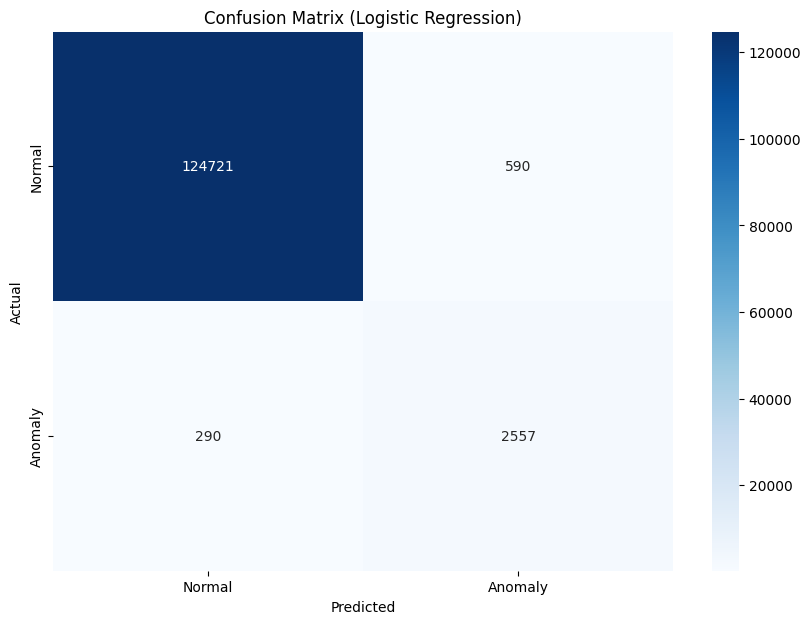

In [57]:
# Plot the Confusion Matrix (Logistic Regression)
plt.figure(figsize=(10,7))
sns.heatmap(cm_ontest, annot=True, fmt='d', cmap='Blues',xticklabels=['Normal','Anomaly'],yticklabels=['Normal','Anomaly'])
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

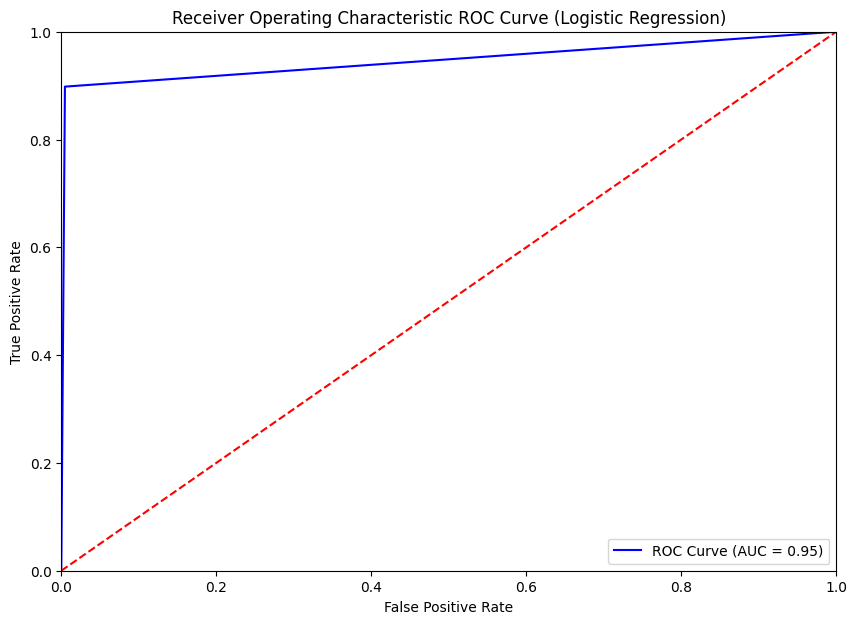

In [58]:
# Plotting ROC Curve (Logistic Regression)
fpr,tpr, thresholds = roc_curve(y_test, y_pred_class, pos_label=1)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(10,7))
plt.plot(fpr,tpr, color='blue',label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic ROC Curve (Logistic Regression)')
plt.legend(loc='lower right')
plt.show()


## b1. Decision Tree - Training

In [59]:
# Peformance Evaluation using cross-validation 
# Assign Decision Tree classifier
clf = DecisionTreeClassifier(random_state=123)



# Apply Stratified 10-fold cross-validator, it provides train/validate indices to split data in train/validate sets.
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

# Set the performance metrics for evaluating
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# perform the 10-fold CV and get the metrics results
cv_results = cross_validate(estimator=clf,
                            X=x_train,
                            y=y_train,
                            scoring=scoring,
                            cv=cv,
                            return_train_score=False) 

In [60]:
cv_results

{'fit_time': array([2.49525428, 2.38543797, 2.70967603, 2.34036422, 2.42843509,
        2.520679  , 2.09306383, 2.38770914, 2.75300717, 2.53869128]),
 'score_time': array([0.10719538, 0.05643225, 0.06849098, 0.07776117, 0.06325698,
        0.06646132, 0.06322217, 0.08277822, 0.0464654 , 0.07627225]),
 'test_accuracy': array([0.9978347 , 0.99873203, 0.99826386, 0.99840041, 0.99869301,
        0.99849794, 0.99828336, 0.99804928, 0.998654  , 0.99828336]),
 'test_precision': array([0.95663717, 0.97614841, 0.9655477 , 0.96740088, 0.96701389,
        0.95323129, 0.96150481, 0.95545852, 0.97022767, 0.96397188]),
 'test_recall': array([0.94575678, 0.96675416, 0.95625547, 0.96062992, 0.97462817,
        0.98075241, 0.96150481, 0.95713036, 0.96937883, 0.95891608]),
 'test_f1': array([0.95116586, 0.97142857, 0.96087912, 0.96400351, 0.9708061 ,
        0.96679603, 0.96150481, 0.95629371, 0.96980306, 0.96143734]),
 'test_roc_auc': array([0.97238956, 0.98310772, 0.97773867, 0.97994585, 0.98693466,
 

In [61]:
print('\nMean Test Accuracy Value')
cv_results['test_accuracy'].mean()


Mean Test Accuracy Value


0.998369194155629

In [62]:
print('\nMean Precision:')
cv_results['test_precision'].mean()


Mean Precision:


0.9637142222106473

In [63]:
print('\nMean Recall:')
cv_results['test_recall'].mean()


Mean Recall:


0.9631706985053441

In [64]:
print('\nMean F1:')
cv_results['test_f1'].mean()


Mean F1:


0.9634118114567608

In [65]:
print('\nMean Roc_Auc:')
cv_results['test_roc_auc'].mean()


Mean Roc_Auc:


0.9811712346980016

## b2. Decision Tree - Performance Evaluation 

In [66]:
# fit the Decision Tree model 
clf.fit(X=x_train, y=y_train)

# predition on testing data
y_pred_class = clf.predict(X=x_test)

# AUC of ROC
auc_ontest = roc_auc_score(y_true=y_test, y_score=y_pred_class)
# precision score
precision_ontest = precision_score(y_true=y_test, y_pred=y_pred_class)
# recall score
recall_ontest = recall_score(y_true=y_test, y_pred=y_pred_class)
# f1 score
f1_ontest = f1_score(y_true=y_test, y_pred=y_pred_class)
# Accuracy score
accuracy_ontest = accuracy_score(y_true=y_test, y_pred=y_pred_class)
# confusion matrix
cm_ontest = confusion_matrix(y_true=y_test, y_pred=y_pred_class)
# classifition report
cls_report_ontest = classification_report(y_true=y_test, y_pred=y_pred_class)

# output the performance results and scores 
print("Decision Tree Model")
print('The model scores {:1.4f} ROC AUC on the test set.'.format(auc_ontest))
print('The precision score on the test set: {:1.4f}'.format(precision_ontest))
print('The recall score on the test set: {:1.4f}'.format(recall_ontest))
print('The f1 score on the test set: {:1.4f}'.format(f1_ontest))
print('The accuracy score on the test set: {:1.4f}'.format(accuracy_ontest))

# output the Confusion Matrix and Classification Report
print('Confusion Matrix:\n', cm_ontest)
print('Classification Report:\n', cls_report_ontest)

Decision Tree Model
The model scores 0.9814 ROC AUC on the test set.
The precision score on the test set: 0.9682
The recall score on the test set: 0.9635
The f1 score on the test set: 0.9658
The accuracy score on the test set: 0.9985
Confusion Matrix:
 [[125221     90]
 [   104   2743]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    125311
           1       0.97      0.96      0.97      2847

    accuracy                           1.00    128158
   macro avg       0.98      0.98      0.98    128158
weighted avg       1.00      1.00      1.00    128158



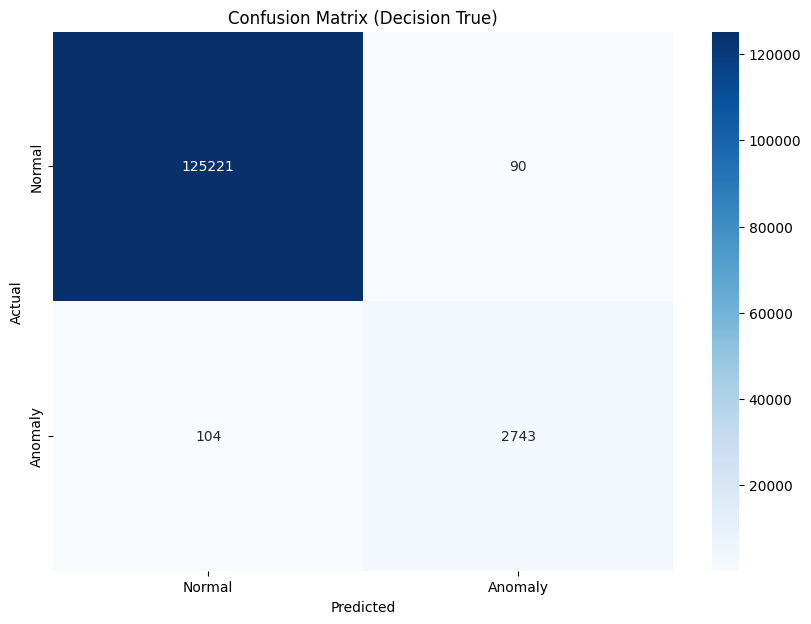

In [67]:
# Plot the Confusion Matrix (Decision Tree)
plt.figure(figsize=(10,7))
sns.heatmap(cm_ontest, annot=True, fmt='d', cmap='Blues',xticklabels=['Normal','Anomaly'],yticklabels=['Normal','Anomaly'])
plt.title('Confusion Matrix (Decision True)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

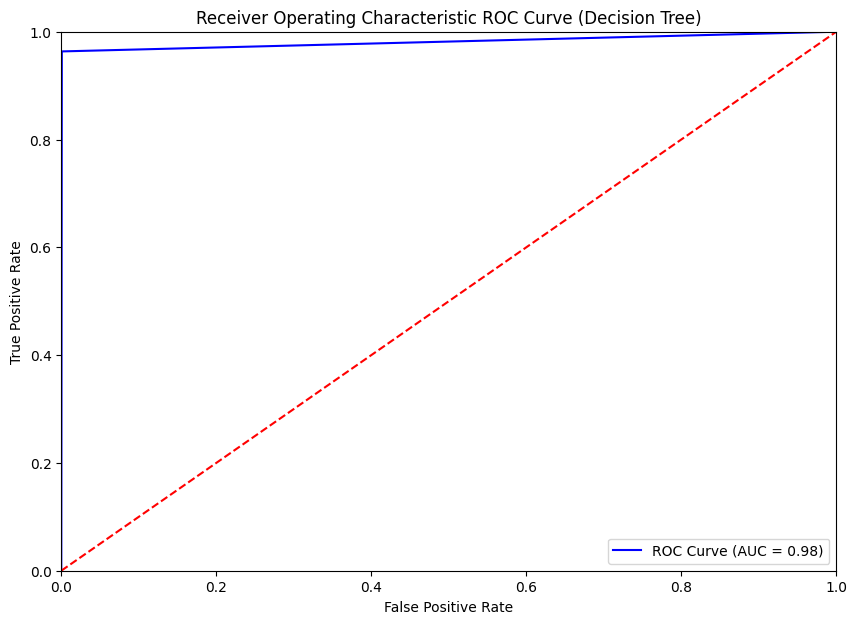

In [68]:
# Plotting ROC Curve (Decision Tree)
fpr,tpr, thresholds = roc_curve(y_test, y_pred_class, pos_label=1)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(10,7))
plt.plot(fpr,tpr, color='blue',label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic ROC Curve (Decision Tree)')
plt.legend(loc='lower right')
plt.show()


## c1. Random Forest - Training

In [69]:
# Peformance Evaluation using cross-validation 
# Assign RandomForest classifier
clf = RandomForestClassifier(random_state=123)

# Apply Stratified 10-fold cross-validator, it provides train/validate indices to split data in train/validate sets.
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

# Set the performance metrics for evaluating
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# perform the 10-fold CV and get the metrics results
cv_results = cross_validate(estimator=clf,
                            X=x_train,
                            y=y_train,
                            scoring=scoring,
                            cv=cv,
                            return_train_score=False) 

In [70]:
cv_results

{'fit_time': array([54.35407805, 50.14412451, 52.10018206, 56.15561557, 51.51737309,
        54.29889178, 53.07909942, 54.95081162, 54.35932517, 51.44586968]),
 'score_time': array([0.34699297, 0.44645667, 0.49001598, 0.43238616, 0.26797056,
        0.37809348, 0.40309215, 0.48354697, 0.35042   , 0.32393742]),
 'test_accuracy': array([0.99801026, 0.99853696, 0.99818583, 0.99816632, 0.99830287,
        0.99814681, 0.99826386, 0.99853696, 0.99820533, 0.99849794]),
 'test_precision': array([0.94832041, 0.95876289, 0.94871795, 0.95411255, 0.95051195,
        0.93739566, 0.94812925, 0.9533107 , 0.94723404, 0.95559351]),
 'test_recall': array([0.96325459, 0.97637795, 0.97112861, 0.96412948, 0.97462817,
        0.98250219, 0.97550306, 0.98250219, 0.97375328, 0.97814685]),
 'test_f1': array([0.95572917, 0.96749025, 0.95979248, 0.95909487, 0.96241901,
        0.95941905, 0.96162139, 0.96768634, 0.96031061, 0.96673866]),
 'test_roc_auc': array([0.99986705, 0.99991754, 0.99984247, 0.99986094, 0.9

In [71]:
print('\nMean Test Accuracy Value')
cv_results['test_accuracy'].mean()


Mean Test Accuracy Value


0.9982853129937773

In [72]:
print('\nMean Precision:')
cv_results['test_precision'].mean()


Mean Precision:


0.9502088907859626

In [73]:
print('\nMean Recall:')
cv_results['test_recall'].mean()


Mean Recall:


0.9741926380705909

In [74]:
print('\nMean F1:')
cv_results['test_f1'].mean()


Mean F1:


0.9620301818437532

In [75]:
print('\nMean Roc_Auc:')
cv_results['test_roc_auc'].mean()


Mean Roc_Auc:


0.9998732698768749

## c2. Random Forest - Performance Evaluation 

In [76]:
# fit the Random Forest model 
clf.fit(X=x_train, y=y_train)

# predition on testing data
y_pred_class = clf.predict(X=x_test)

# AUC of ROC
auc_ontest = roc_auc_score(y_true=y_test, y_score=y_pred_class)
# precision score
precision_ontest = precision_score(y_true=y_test, y_pred=y_pred_class)
# recall score
recall_ontest = recall_score(y_true=y_test, y_pred=y_pred_class)
# f1 score
f1_ontest = f1_score(y_true=y_test, y_pred=y_pred_class)
# Accuracy score
accuracy_ontest = accuracy_score(y_true=y_test, y_pred=y_pred_class)
# confusion matrix
cm_ontest = confusion_matrix(y_true=y_test, y_pred=y_pred_class)
# classifition report
cls_report_ontest = classification_report(y_true=y_test, y_pred=y_pred_class)

# output the performance results and scores 
print("Random Forest Model")
print('The model scores {:1.4f} ROC AUC on the test set.'.format(auc_ontest))
print('The precision score on the test set: {:1.4f}'.format(precision_ontest))
print('The recall score on the test set: {:1.4f}'.format(recall_ontest))
print('The f1 score on the test set: {:1.4f}'.format(f1_ontest))
print('The accuracy score on the test set: {:1.4f}'.format(accuracy_ontest))

# output the Confusion Matrix and Classification Report
print('Confusion Matrix:\n', cm_ontest)
print('Classification Report:\n', cls_report_ontest)

Random Forest Model
The model scores 0.9884 ROC AUC on the test set.
The precision score on the test set: 0.9567
The recall score on the test set: 0.9779
The f1 score on the test set: 0.9672
The accuracy score on the test set: 0.9985
Confusion Matrix:
 [[125185    126]
 [    63   2784]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    125311
           1       0.96      0.98      0.97      2847

    accuracy                           1.00    128158
   macro avg       0.98      0.99      0.98    128158
weighted avg       1.00      1.00      1.00    128158



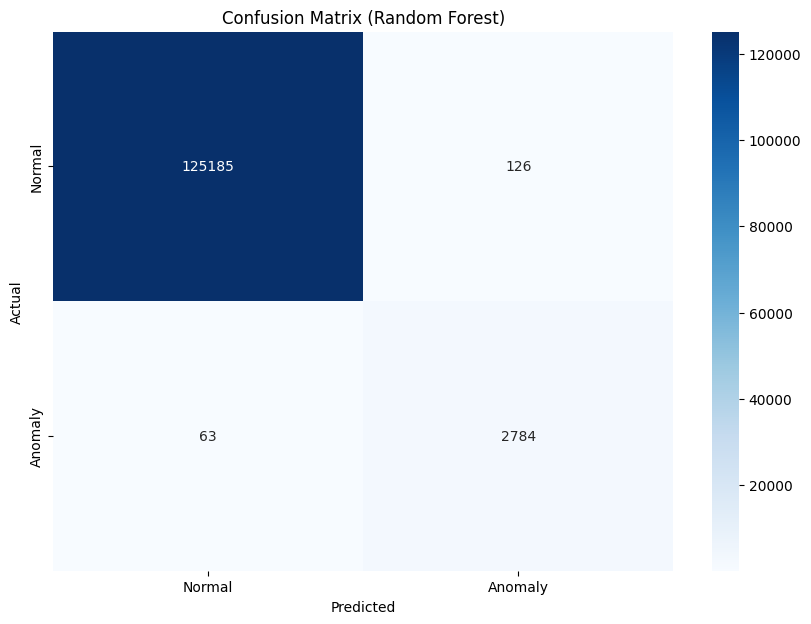

In [77]:
# Plot the Confusion Matrix (Random Forest)
plt.figure(figsize=(10,7))
sns.heatmap(cm_ontest, annot=True, fmt='d', cmap='Blues',xticklabels=['Normal','Anomaly'],yticklabels=['Normal','Anomaly'])
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

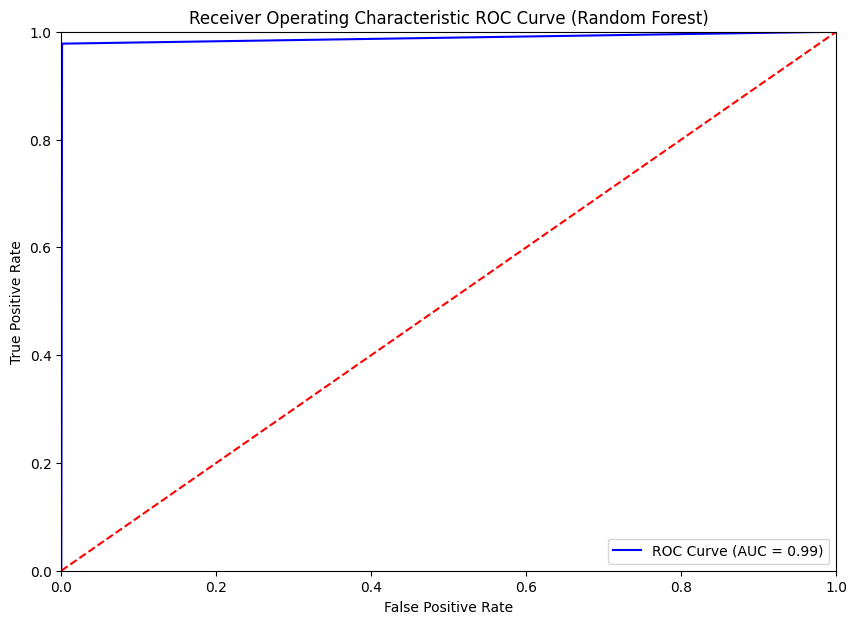

In [78]:
# Plotting ROC Curve (Random Forest)
fpr,tpr, thresholds = roc_curve(y_test, y_pred_class, pos_label=1)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(10,7))
plt.plot(fpr,tpr, color='blue',label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()


## d1. Support Vector Classifier (SVC) - Training

In [79]:
# Peformance Evaluation using cross-validation 
# Assign SVC classifier
clf = SVC(kernel='linear', random_state=42)  

# Apply Stratified 10-fold cross-validator, it provides train/validate indices to split data in train/validate sets.
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

# Set the performance metrics for evaluating
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# perform the 10-fold CV and get the metrics results
cv_results = cross_validate(estimator=clf,
                            X=x_train,
                            y=y_train,
                            scoring=scoring,
                            cv=cv,
                            return_train_score=False) 

In [80]:
cv_results

{'fit_time': array([ 976.84360838,  887.93177056,  976.79396391, 1036.69112682,
         983.83422732,  978.66492701, 1067.74011016, 1033.68926144,
        1032.92445111, 1025.74496508]),
 'score_time': array([12.77760124, 13.3495214 , 14.13155651, 12.95689583, 13.91573811,
        13.71964645, 13.12107897, 13.89170504, 13.96894956, 12.93665123]),
 'test_accuracy': array([0.99393325, 0.99438191, 0.9937967 , 0.99405029, 0.99385522,
        0.99360162, 0.99387472, 0.99418684, 0.99352359, 0.99364064]),
 'test_precision': array([0.79799427, 0.81136198, 0.79359431, 0.8023088 , 0.80043541,
        0.79379957, 0.80014482, 0.80952381, 0.78984989, 0.79172611]),
 'test_recall': array([0.97462817, 0.97462817, 0.97550306, 0.97287839, 0.96500437,
        0.96325459, 0.96675416, 0.96675416, 0.96675416, 0.97027972]),
 'test_f1': array([0.87751083, 0.88553259, 0.87519623, 0.87939897, 0.87504958,
        0.87035573, 0.87559429, 0.88118022, 0.86939418, 0.87195601]),
 'test_roc_auc': array([0.99794052, 0

In [81]:
print('\nMean Test Accuracy Value')
cv_results['test_accuracy'].mean()


Mean Test Accuracy Value


0.993884478083608

In [82]:
print('\nMean Precision:')
cv_results['test_precision'].mean()


Mean Precision:


0.7990738970277776

In [83]:
print('\nMean Recall:')
cv_results['test_recall'].mean()


Mean Recall:


0.9696438950375958

In [84]:
print('\nMean F1:')
cv_results['test_f1'].mean()


Mean F1:


0.8761168646734434

In [85]:
print('\nMean Roc_Auc:')
cv_results['test_roc_auc'].mean()


Mean Roc_Auc:


0.9981199813528567

## d2. Support Vector Classifier (SVC) - Performance Evaluation 

In [86]:
# fit the SVC model 
clf.fit(X=x_train, y=y_train)

# predition on testing data
y_pred_class = clf.predict(X=x_test)

# AUC of ROC
auc_ontest = roc_auc_score(y_true=y_test, y_score=y_pred_class)
# precision score
precision_ontest = precision_score(y_true=y_test, y_pred=y_pred_class)
# recall score
recall_ontest = recall_score(y_true=y_test, y_pred=y_pred_class)
# f1 score
f1_ontest = f1_score(y_true=y_test, y_pred=y_pred_class)
# Accuracy score
accuracy_ontest = accuracy_score(y_true=y_test, y_pred=y_pred_class)
# confusion matrix
cm_ontest = confusion_matrix(y_true=y_test, y_pred=y_pred_class)
# classifition report
cls_report_ontest = classification_report(y_true=y_test, y_pred=y_pred_class)

# output the performance results and scores 
print("SVC Model")
print('The model scores {:1.4f} ROC AUC on the test set.'.format(auc_ontest))
print('The precision score on the test set: {:1.4f}'.format(precision_ontest))
print('The recall score on the test set: {:1.4f}'.format(recall_ontest))
print('The f1 score on the test set: {:1.4f}'.format(f1_ontest))
print('The accuracy score on the test set: {:1.4f}'.format(accuracy_ontest))

# output the Confusion Matrix and Classification Report
print('Confusion Matrix:\n', cm_ontest)
print('Classification Report:\n', cls_report_ontest)

SVC Model
The model scores 0.9834 ROC AUC on the test set.
The precision score on the test set: 0.8019
The recall score on the test set: 0.9723
The f1 score on the test set: 0.8789
The accuracy score on the test set: 0.9940
Confusion Matrix:
 [[124627    684]
 [    79   2768]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    125311
           1       0.80      0.97      0.88      2847

    accuracy                           0.99    128158
   macro avg       0.90      0.98      0.94    128158
weighted avg       0.99      0.99      0.99    128158



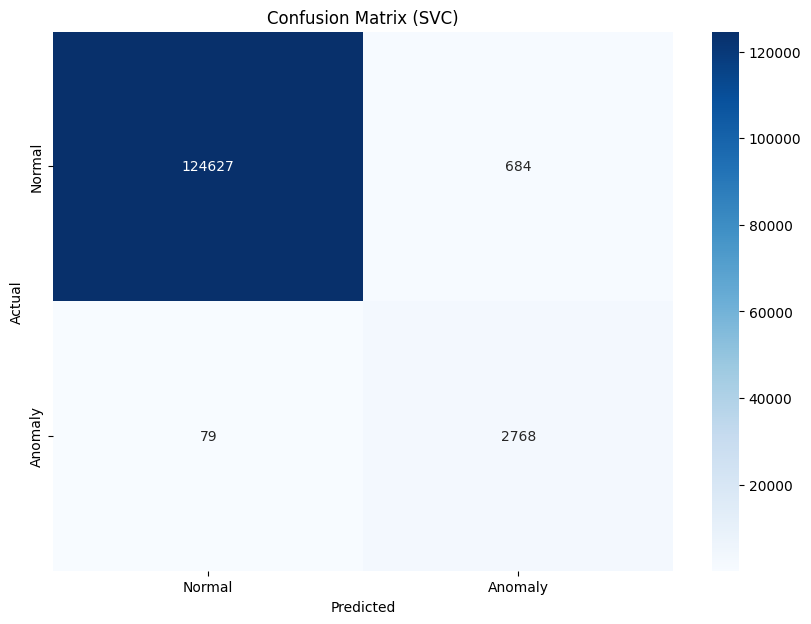

In [87]:
# Plot the Confusion Matrix (SVC)
plt.figure(figsize=(10,7))
sns.heatmap(cm_ontest, annot=True, fmt='d', cmap='Blues',xticklabels=['Normal','Anomaly'],yticklabels=['Normal','Anomaly'])
plt.title('Confusion Matrix (SVC)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

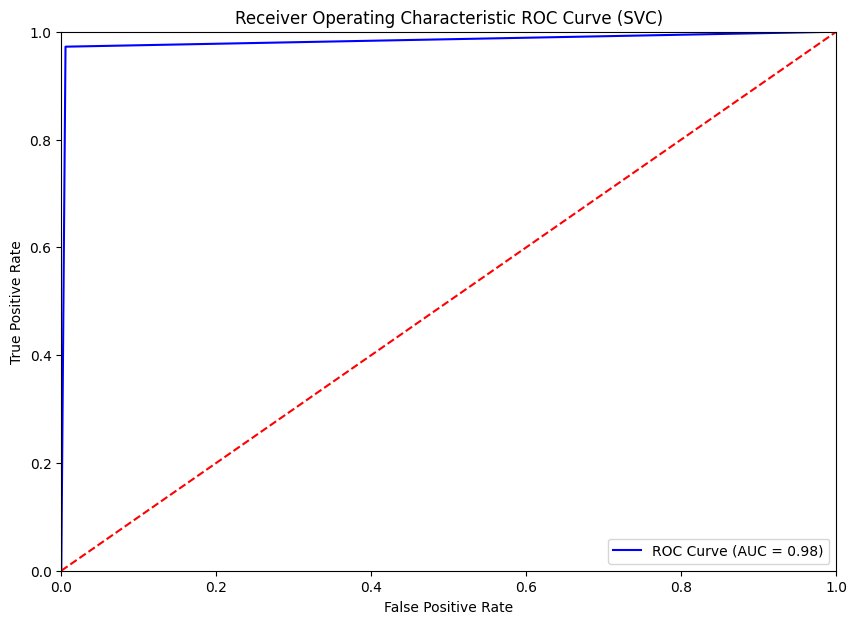

In [88]:
# Plotting ROC Curve (SVC)
fpr,tpr, thresholds = roc_curve(y_test, y_pred_class, pos_label=1)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(10,7))
plt.plot(fpr,tpr, color='blue',label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic ROC Curve (SVC)')
plt.legend(loc='lower right')
plt.show()


## e1. Multi-Layer Perceptron (MLP) - Training

In [35]:
# Peformance Evaluation using cross-validation 
# Assign MLP classifier
# clf = MLPClassifier(random_state=123,solver='adam',max_iter=8000)   
clf = MLPClassifier(hidden_layer_sizes=(64, 32),max_iter=8000, random_state=42)

# Apply Stratified 10-fold cross-validator, it provides train/validate indices to split data in train/validate sets.
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

# Set the performance metrics for evaluating
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# perform the 10-fold CV and get the metrics results
cv_results = cross_validate(estimator=clf,
                            X=x_train,
                            y=y_train,
                            scoring=scoring,
                            cv=cv,
                            return_train_score=False) 

In [60]:
cv_results

{'fit_time': array([ 992.53585887,  870.68959999,  950.24778771, 1044.9169066 ,
         960.33506036,  971.96708512, 1097.39223313, 1012.32901168,
         989.43847656, 1023.87968612]),
 'score_time': array([14.12666321, 14.11569953, 14.07888365, 13.71035743, 13.41277027,
        13.94691706, 13.76300573, 13.41295338, 12.81091046, 14.56534576]),
 'test_accuracy': array([0.99393325, 0.99438191, 0.9937967 , 0.99405029, 0.99385522,
        0.99360162, 0.99387472, 0.99418684, 0.99352359, 0.99364064]),
 'test_precision': array([0.79799427, 0.81136198, 0.79359431, 0.8023088 , 0.80043541,
        0.79379957, 0.80014482, 0.80952381, 0.78984989, 0.79172611]),
 'test_recall': array([0.97462817, 0.97462817, 0.97550306, 0.97287839, 0.96500437,
        0.96325459, 0.96675416, 0.96675416, 0.96675416, 0.97027972]),
 'test_f1': array([0.87751083, 0.88553259, 0.87519623, 0.87939897, 0.87504958,
        0.87035573, 0.87559429, 0.88118022, 0.86939418, 0.87195601]),
 'test_roc_auc': array([0.99794052, 0

In [61]:
print('\nMean Test Accuracy Value')
cv_results['test_accuracy'].mean()


Mean Test Accuracy Value


0.993884478083608

In [62]:
print('\nMean Precision:')
cv_results['test_precision'].mean()


Mean Precision:


0.7990738970277776

In [63]:
print('\nMean Recall:')
cv_results['test_recall'].mean()


Mean Recall:


0.9696438950375958

In [64]:
print('\nMean F1:')
cv_results['test_f1'].mean()


Mean F1:


0.8761168646734434

In [65]:
print('\nMean Roc_Auc:')
cv_results['test_roc_auc'].mean()


Mean Roc_Auc:


0.9981199813528567

## e2. Multi-Layer Perceptron (MLP) - Performance Evaluation 

In [36]:
# fit the MLP model 
clf.fit(X=x_train, y=y_train)

# predition on testing data
y_pred_class = clf.predict(X=x_test)

# AUC of ROC
auc_ontest = roc_auc_score(y_true=y_test, y_score=y_pred_class)
# precision score
precision_ontest = precision_score(y_true=y_test, y_pred=y_pred_class)
# recall score
recall_ontest = recall_score(y_true=y_test, y_pred=y_pred_class)
# f1 score
f1_ontest = f1_score(y_true=y_test, y_pred=y_pred_class)
# Accuracy score
accuracy_ontest = accuracy_score(y_true=y_test, y_pred=y_pred_class)
# confusion matrix
cm_ontest = confusion_matrix(y_true=y_test, y_pred=y_pred_class)
# classifition report
cls_report_ontest = classification_report(y_true=y_test, y_pred=y_pred_class)

# output the performance results and scores 
print("MLP Model")
print('The model scores {:1.4f} ROC AUC on the test set.'.format(auc_ontest))
print('The precision score on the test set: {:1.4f}'.format(precision_ontest))
print('The recall score on the test set: {:1.4f}'.format(recall_ontest))
print('The f1 score on the test set: {:1.4f}'.format(f1_ontest))
print('The accuracy score on the test set: {:1.4f}'.format(accuracy_ontest))

# output the Confusion Matrix and Classification Report
print('Confusion Matrix:\n', cm_ontest)
print('Classification Report:\n', cls_report_ontest)

MLP Model
The model scores 0.9749 ROC AUC on the test set.
The precision score on the test set: 0.8851
The recall score on the test set: 0.9526
The f1 score on the test set: 0.9176
The accuracy score on the test set: 0.9962
Confusion Matrix:
 [[124959    352]
 [   135   2712]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    125311
           1       0.89      0.95      0.92      2847

    accuracy                           1.00    128158
   macro avg       0.94      0.97      0.96    128158
weighted avg       1.00      1.00      1.00    128158



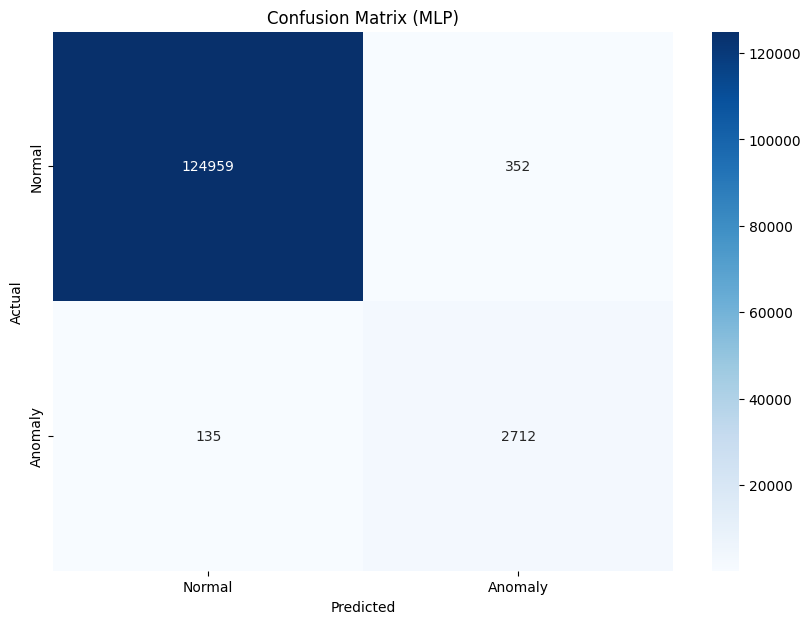

In [38]:
# Plot the Confusion Matrix (MLP)
plt.figure(figsize=(10,7))
sns.heatmap(cm_ontest, annot=True, fmt='d', cmap='Blues',xticklabels=['Normal','Anomaly'],yticklabels=['Normal','Anomaly'])
plt.title('Confusion Matrix (MLP)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

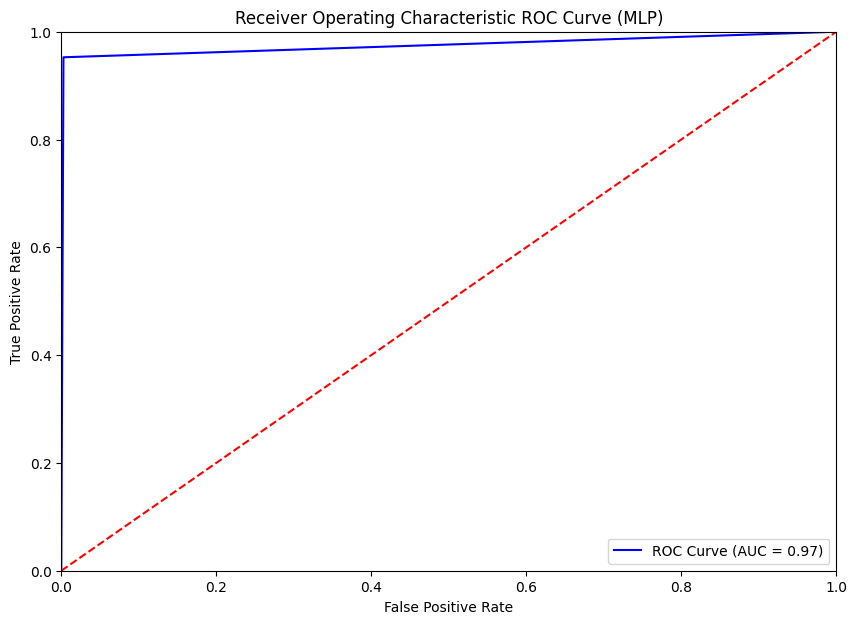

In [41]:
# Plotting ROC Curve (MLP)
fpr,tpr, thresholds = roc_curve(y_test, y_pred_class, pos_label=1)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(10,7))
plt.plot(fpr,tpr, color='blue',label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic ROC Curve (MLP)')
plt.legend(loc='lower right')
plt.show()


## END